## Data Visualization-Data Insurance

### Import Excel Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('sampledatainsurance.xlsx', sheet_name='PolicyData')
df.head()

,Policy,Expiry,Location,State,Region,InsuredValue,Construction,BusinessType,Earthquake,Flood
0,100242,2021-01-02,Urban,NY,East,1617630,Frame,Retail,N,N
1,100314,2021-01-02,Urban,NY,East,8678500,Fire Resist,Apartment,Y,Y
2,100359,2021-01-02,Rural,WI,Midwest,2052660,Frame,Farming,N,N
3,100315,2021-01-03,Urban,NY,East,17580000,Frame,Apartment,Y,Y
4,100385,2021-01-03,Urban,NY,East,1925000,Masonry,Hospitality,N,N


In [2]:
df.shape

(500, 10)

#### Cek tipe data per kolom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Policy        500 non-null    int64         
 1   Expiry        500 non-null    datetime64[ns]
 2   Location      500 non-null    object        
 3   State         500 non-null    object        
 4   Region        500 non-null    object        
 5   InsuredValue  500 non-null    int64         
 6   Construction  500 non-null    object        
 7   BusinessType  500 non-null    object        
 8   Earthquake    500 non-null    object        
 9   Flood         500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 39.2+ KB


In [4]:
df.describe()

,Policy,InsuredValue
count,500.000000,5.000000e+02
mean,100656.020000,4.964411e+06
std,274.861014,6.205834e+06
min,100200.000000,3.000000e+04
25%,100411.750000,1.603600e+06
50%,100652.500000,2.593682e+06
75%,100894.250000,6.005692e+06
max,101126.000000,5.341061e+07


#### Ubah kolom int menjadi objek pada kolom Policy

In [5]:
df['Policy'] = df['Policy'].astype('str')

In [6]:
df.dtypes

Policy                  object
Expiry          datetime64[ns]
Location                object
State                   object
Region                  object
InsuredValue             int64
Construction            object
BusinessType            object
Earthquake              object
Flood                   object
dtype: object

### Cek NaN/Null

In [7]:
df.isna().sum()

Policy          0
Expiry          0
Location        0
State           0
Region          0
InsuredValue    0
Construction    0
BusinessType    0
Earthquake      0
Flood           0
dtype: int64

#### Buat kolom berisi bulan kadaluarsa

In [8]:
df['Month Expiry'] = pd.to_datetime(df['Expiry']).dt.to_period('M')
df.head()

,Policy,Expiry,Location,State,Region,InsuredValue,Construction,BusinessType,Earthquake,Flood,Month Expiry
0,100242,2021-01-02,Urban,NY,East,1617630,Frame,Retail,N,N,2021-01
1,100314,2021-01-02,Urban,NY,East,8678500,Fire Resist,Apartment,Y,Y,2021-01
2,100359,2021-01-02,Rural,WI,Midwest,2052660,Frame,Farming,N,N,2021-01
3,100315,2021-01-03,Urban,NY,East,17580000,Frame,Apartment,Y,Y,2021-01
4,100385,2021-01-03,Urban,NY,East,1925000,Masonry,Hospitality,N,N,2021-01


In [9]:
insurance_region = df.groupby(['Region','Location'])['InsuredValue'].sum().reset_index()
insurance_region.head()

,Region,Location,InsuredValue
0,Central,Rural,10617800
1,Central,Urban,38655793
2,East,Rural,183012687
3,East,Urban,1643009131
4,Midwest,Rural,76650378


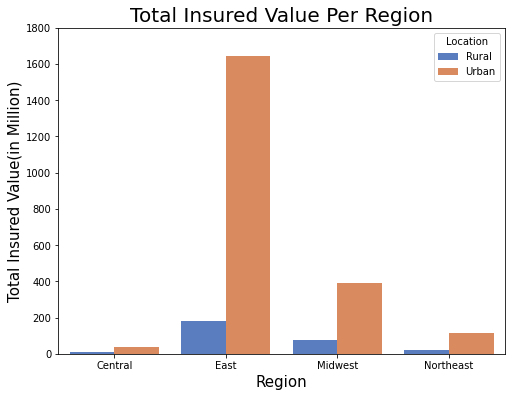

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(x='Region', y='InsuredValue', hue='Location', data=insurance_region, ci=None, palette='muted')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Insured Value(in Million)', fontsize=15)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.title('Total Insured Value Per Region', fontsize=20)
plt.show()

In [11]:
state_location = df.groupby('State')['Location'].value_counts().unstack()
state_location.head(3)

Location,Rural,Urban
State,,
IL,3.0,11.0
ME,NaN,4.0
MI,1.0,6.0


In [12]:
state_location['Rural'] =state_location['Rural'].fillna(0).astype('int')
state_location['Urban'] =state_location['Urban'].fillna(0).astype('int')
state_location.head(3)

Location,Rural,Urban
State,,
IL,3,11
ME,0,4
MI,1,6


<Figure size 432x288 with 0 Axes>

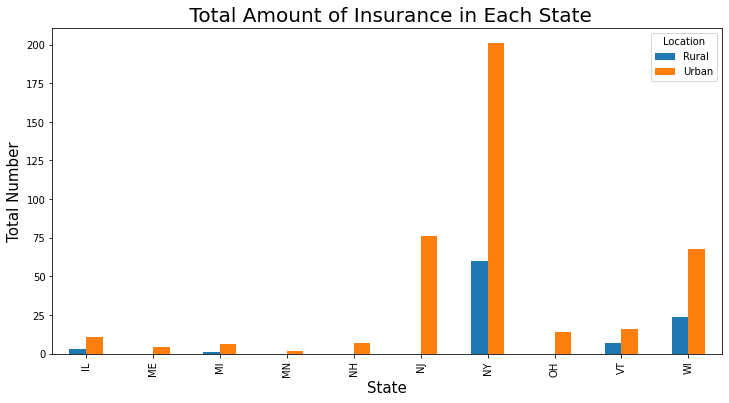

In [35]:
plt.clf()
state_location.plot(kind='bar')
plt.gcf().set_size_inches(12, 6)
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Number', fontsize=15)
plt.title(' Total Amount of Insurance in Each State', fontsize=20)
plt.show()

#### Melihat banyaknya tipe bisnis

In [14]:
business_type = df['BusinessType'].value_counts()
business_type

Apartment        169
Farming          117
Office Bldg       99
Hospitality       34
Retail            25
Manufacturing     16
Organization      15
Construction       7
Service            6
Other              6
Recreation         3
Medical            2
Education          1
Name: BusinessType, dtype: int64

/home/rohmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


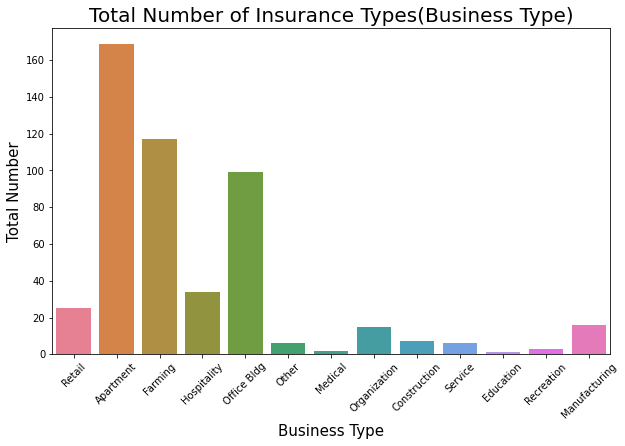

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='BusinessType', data=df, palette='husl')
plt.xticks(Rotation=45)
plt.xlabel('Business Type', fontsize=15)
plt.ylabel('Total Number', fontsize=15)
plt.title('Total Number of Insurance Types(Business Type)', fontsize=20)
plt.show()

In [16]:
business_construction = df.groupby('BusinessType')['Construction'].value_counts().unstack()
business_construction

Construction,Fire Resist,Frame,Masonry,Metal Clad
BusinessType,,,,
Apartment,19.0,112.0,35.0,3.0
Construction,1.0,5.0,1.0,NaN
Education,NaN,1.0,NaN,NaN
Farming,NaN,93.0,10.0,14.0
Hospitality,5.0,16.0,11.0,2.0
Manufacturing,1.0,7.0,3.0,5.0
Medical,NaN,1.0,1.0,NaN
Office Bldg,6.0,63.0,26.0,4.0
Organization,NaN,9.0,6.0,NaN


In [17]:
business_construction['Fire Resist'] = business_construction['Fire Resist'].fillna(0).astype('int')
business_construction['Frame'] = business_construction['Frame'].fillna(0).astype('int')
business_construction['Masonry'] = business_construction['Masonry'].fillna(0).astype('int')
business_construction['Metal Clad'] = business_construction['Metal Clad'].fillna(0).astype('int')
business_construction

Construction,Fire Resist,Frame,Masonry,Metal Clad
BusinessType,,,,
Apartment,19,112,35,3
Construction,1,5,1,0
Education,0,1,0,0
Farming,0,93,10,14
Hospitality,5,16,11,2
Manufacturing,1,7,3,5
Medical,0,1,1,0
Office Bldg,6,63,26,4
Organization,0,9,6,0


/home/rohmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

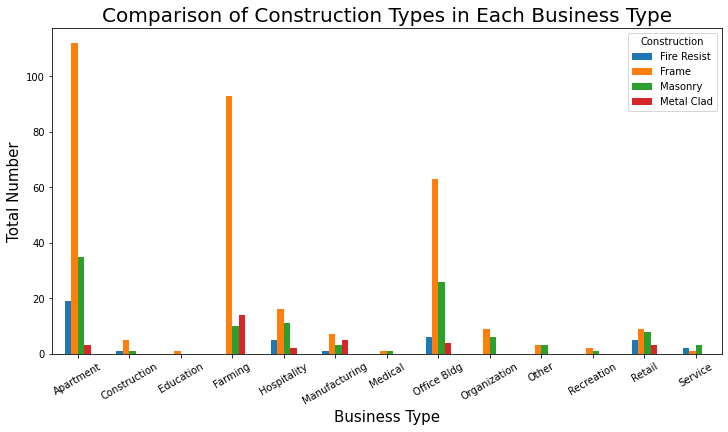

In [33]:
plt.clf()
business_construction.plot(kind='bar')
plt.xticks(Rotation=30)
plt.xlabel('Business Type', fontsize=15)
plt.ylabel('Total Number', fontsize=15)
plt.title('Comparison of Construction Types in Each Business Type', fontsize=20)
plt.gcf().set_size_inches(12, 6)

In [19]:
construction_type = df['Construction'].value_counts().reset_index()
construction_type

,index,Construction
0,Frame,322
1,Masonry,108
2,Fire Resist,39
3,Metal Clad,31


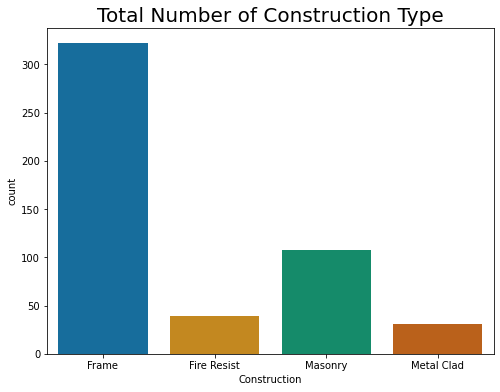

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(x='Construction', data=df, palette='colorblind')
plt.title('Total Number of Construction Type', fontsize=20)
plt.show()

In [21]:
df['State'].nunique()

10

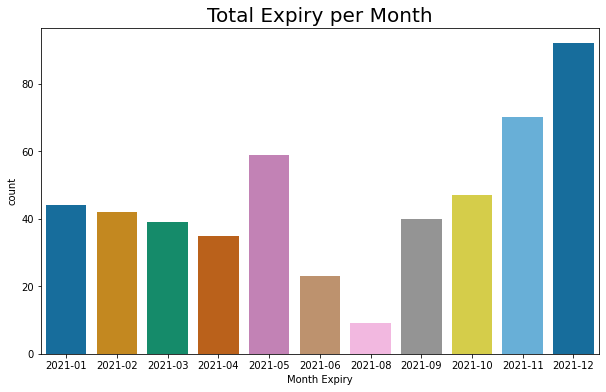

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='Month Expiry', data=df, palette='colorblind')
plt.title('Total Expiry per Month', fontsize=20)
plt.show()

In [23]:
value_distribution = df.groupby('Region')['InsuredValue'].sum().reset_index()
value_distribution

,Region,InsuredValue
0,Central,49273593
1,East,1826021818
2,Midwest,468727102
3,Northeast,138182968


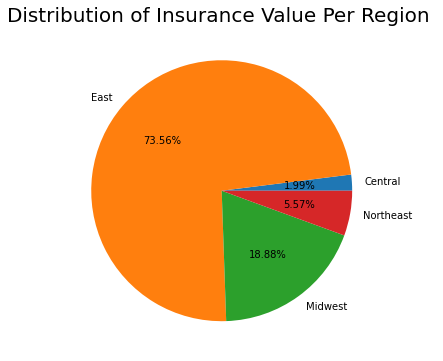

In [28]:
plt.figure(figsize=(8,6))
plt.pie(value_distribution['InsuredValue'], labels= value_distribution['Region'], autopct='%1.2f%%')
plt.title('Distribution of Insurance Value Per Region ', fontsize=20)
plt.show()

#### Melihat jumlah asuransi untuk bencana >> earthquake/flood

In [25]:
df['Earthquake'] = pd.get_dummies(df['Earthquake'])
df['Flood'] = pd.get_dummies(df['Flood'])
df.head(3)

,Policy,Expiry,Location,State,Region,InsuredValue,Construction,BusinessType,Earthquake,Flood,Month Expiry
0,100242,2021-01-02,Urban,NY,East,1617630,Frame,Retail,1,1,2021-01
1,100314,2021-01-02,Urban,NY,East,8678500,Fire Resist,Apartment,0,0,2021-01
2,100359,2021-01-02,Rural,WI,Midwest,2052660,Frame,Farming,1,1,2021-01


In [26]:
df['Disaster Type'] = df.apply(lambda row:3 if row['Earthquake']==1 & row['Flood']==1 else (1 if row['Earthquake']== 1 & row['Flood']==0 else 2 ), axis=1)
df.head(10)

,Policy,Expiry,Location,State,Region,InsuredValue,Construction,BusinessType,Earthquake,Flood,Month Expiry,Disaster Type
0,100242,2021-01-02,Urban,NY,East,1617630,Frame,Retail,1,1,2021-01,3
1,100314,2021-01-02,Urban,NY,East,8678500,Fire Resist,Apartment,0,0,2021-01,1
2,100359,2021-01-02,Rural,WI,Midwest,2052660,Frame,Farming,1,1,2021-01,3
3,100315,2021-01-03,Urban,NY,East,17580000,Frame,Apartment,0,0,2021-01,1
4,100385,2021-01-03,Urban,NY,East,1925000,Masonry,Hospitality,1,1,2021-01,3
5,100388,2021-01-04,Urban,IL,Midwest,12934500,Frame,Apartment,0,0,2021-01,1
6,100358,2021-01-05,Urban,WI,Midwest,928300,Masonry,Office Bldg,1,1,2021-01,3
7,100264,2021-01-07,Rural,NY,East,2219900,Frame,Farming,1,1,2021-01,3
8,100265,2021-01-07,Urban,NY,East,14100000,Frame,Apartment,0,0,2021-01,1
9,100357,2021-01-08,Urban,NY,East,4762808,Masonry,Other,0,0,2021-01,1


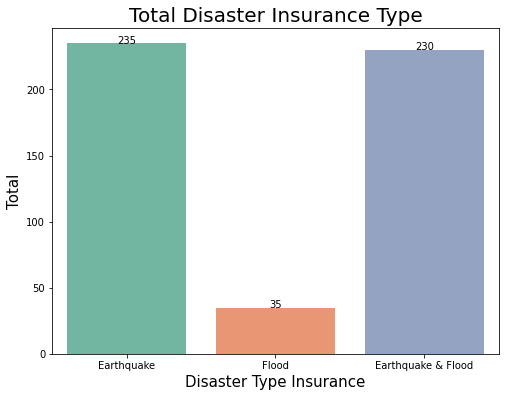

In [27]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Disaster Type', data=df, palette='Set2')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y= p.get_xy()
    ax.text(x+width/2, y+height, '{:.0f}'.format(height), ha='center')
plt.xlabel('Disaster Type Insurance', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.title('Total Disaster Insurance Type', fontsize=20)
plt.xticks([0,1,2], ['Earthquake', 'Flood','Earthquake & Flood'])
plt.show()